In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [24]:
import numpy as np
import seaborn as sns

from util.data import load_mnist, encode_data
from util.plots import plot_images, plot_image
from util.metrics import sp_stability, calc_noise_robustness

from SpatialPooler import SpatialPooler

<IPython.core.display.Javascript object>

In [4]:
(_, _), (x_test, y_test) = load_mnist()
x_test = encode_data(x_test)

<IPython.core.display.Javascript object>

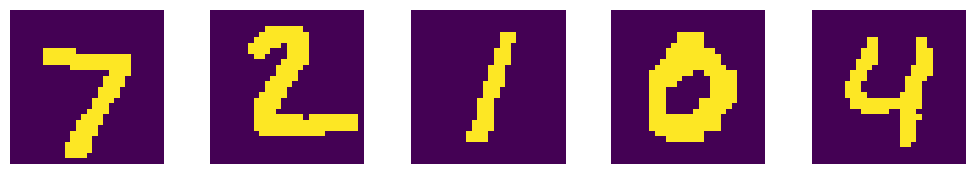

<IPython.core.display.Javascript object>

In [7]:
plot_images(x_test[:5])

In [10]:
sp = SpatialPooler(
    input_dimension=x_test[0].shape,
    column_dimension=(45, 45),
    connection_sparsity=0.7,
    permanence_threshold=0.5,
    stimulus_threshold=10,
    permanence_increment=0.1,
    permanence_decrement=0.02,
    column_sparsity=0.02,
    potential_pool_radius=8,
    boost_strength=10,
)

<IPython.core.display.Javascript object>

In [15]:
sp.load_state("data/12-02-2022_20-06-20/sp.pkl")

<IPython.core.display.Javascript object>

<AxesSubplot:>

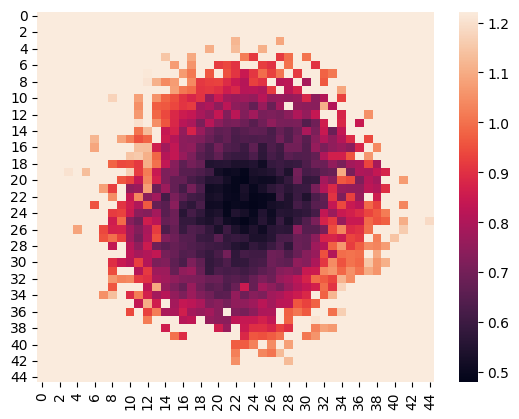

<IPython.core.display.Javascript object>

In [27]:
sns.heatmap(sp.boost_factors.reshape(45, 45))

In [38]:
sp.active_duty_cycle.shape

(2025,)

<IPython.core.display.Javascript object>

<AxesSubplot:>

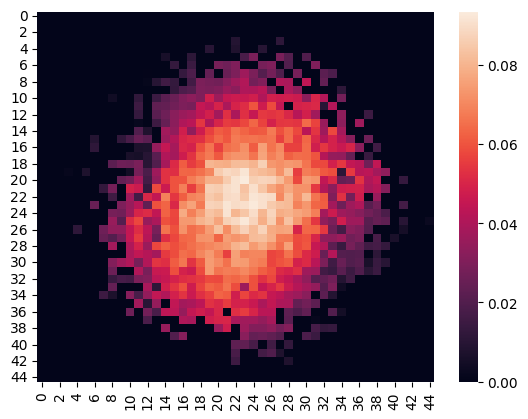

<IPython.core.display.Javascript object>

In [41]:
sns.heatmap(sp.active_duty_cycle.reshape((45, 45)))

<AxesSubplot:>

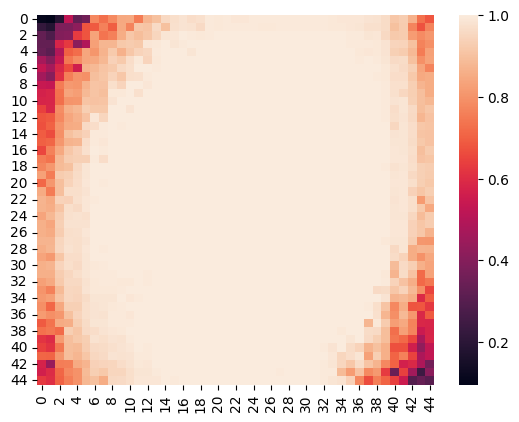

<IPython.core.display.Javascript object>

In [43]:
sns.heatmap(sp.overlap_duty_cycles.reshape((45, 45)))

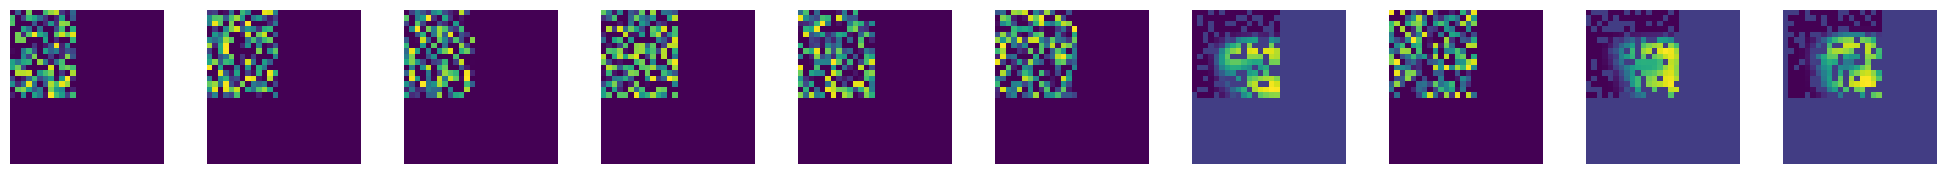

<IPython.core.display.Javascript object>

In [36]:
plot_images(sp.permanences[500:510].reshape((10, 28, 28)))

10it [00:05,  1.71it/s]


<AxesSubplot:>

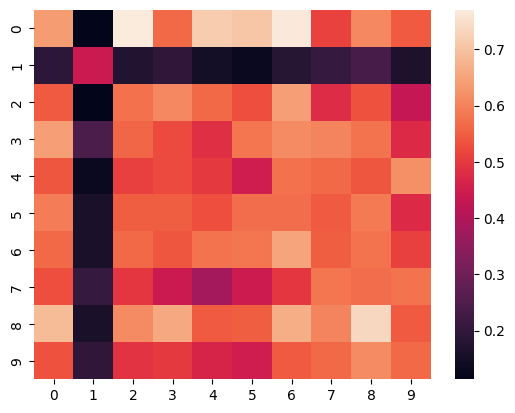

<IPython.core.display.Javascript object>

In [20]:
stability = sp_stability(sp, x_test, y_test, random=False)
sns.heatmap(stability)

In [23]:
calc_noise_robustness(sp, x_test[:5])

0it [00:00, ?it/s]/home/shrank/dev/bachelor-thesis-research/util/metrics.py:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrant, 0, 1)
5it [01:28, 17.77s/it]


0.19820923086416462

<IPython.core.display.Javascript object>